### 접근
- 선분이 겹칠 때 역방향으로 이동하는 간선에 대해서 추가적으로 고려해야 한다.
- 겹치는 상황을 정리하면 이렇게 될 것 같다.
  - 선분이 겹치지 않을 경우
    - 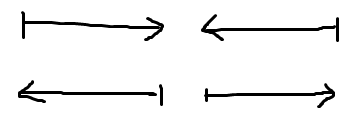
      - 위쪽의 케이스의 경우 자연스럽게 왼쪽에서 오른쪽으로 진행하는게 가장 최선이라는 것이 직관적으로 보인다.
    - 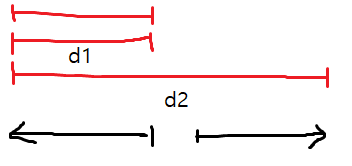
    - 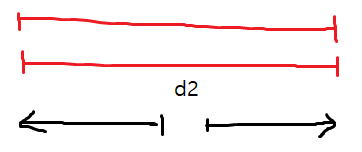
      - 위처럼 2가지 방법으로 이동할 수 있는데, `d1`의 길이가 충분히 길다면 2번의 방법대로 이동하는 것이 더 좋을수도 있다.
      - 하지만 2번 방법으로 이동하면 현재 위치가 맨 왼쪽으로 가게 되므로, 다시 정방향으로 옮겨야 할 목적지가 생길경우 더 불리해질 수 있다.
        - 정확히 고려하자면 저 거리보다 오른쪽에 있는 보트를 이동해야 할 경우 `d2`만큼을 추가로 이동해야 한다. 반면 위의 1번 방법으로 가면 `d2-d1`만큼만 이동하면 된다.
    - 여기서 한가지 아이디어가 생기는게, 같은 방향으로 이동하는 정점을 전부 하나의 선분으로 보게끔 합치는게 어떨까 하는 생각이 들었다.
      - 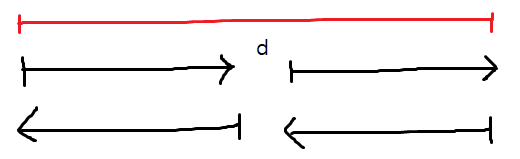
      - 위 처럼 겹치지 않을 경우에도, 보트는 `d`만큼의 거리를 이동해야 하기 때문
      - 이렇게 하면, 정방향으로 이동하는 정점들은 모두 하나의 선분으로 보게 된다.
      - 위의 2번 방법으로 이동하는 경우에 대해서도 복잡성이 줄게 된다. 왼쪽에서 다시 오른쪽으로 가는 경우를 고려하지 않아도 되므로.
        - 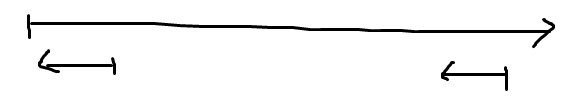
        - 그런데, 이럴 경우엔 합치면 안될 것 같다.. 이따가 고려해보자.
    - 선분이 일부 겹칠경우
      - 이 역시 두가지 경우가 있을 수 있다.
      - 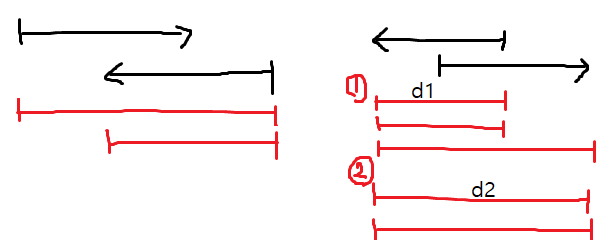
      - 왼쪽의 경우는 저 방법대로 이동하는것이 최선이므로 고려의 문제가 없다.
      - 오른쪽의 경우는 아까와 마찬가지로 `d1`의 길이, 이후 더 오른쪽에 목적지가 있는지에 따라 1번과 2번을 선택해야 한다.
    - 완전히 겹칠경우
      - 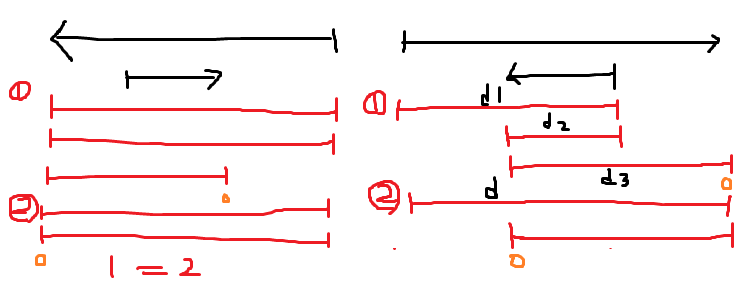
      - 왼쪽의 경우 더 오른쪽에 목적지가 있다고 하더라도, 1번의 경우를 선택해야할 경우가 없으므로, 2번의 경우만 고려하면 된다.
      - 오른쪽의 경우에는 `d1 + d2`의 거리와 더 오른쪽에 목적지가 있는지 여부에 따라 바뀐다.
- 아주 많은 경우를 따져야 하는데, 이를 정리해서 스위핑으로 구현하는게 맞는지 약간 의구심이 들어 풀이를 보기로 결심했다.

### 풀이
- 모든 사람을 데러다주고 M으로 이동한다는 부분을 놓친것이 풀이가 복잡해진 원인이 됐다.
- 증가하는 값에 대해선 어짜피 M으로 이동하면서 모두 데려다주므로, 감소하는 값에 대해서만 고려하면 된다.
  - 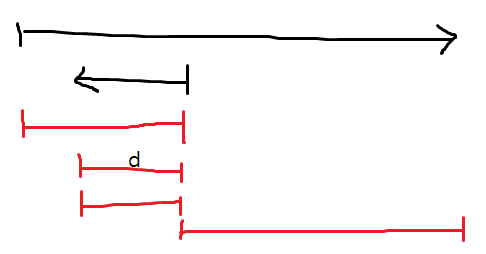
  - 역방향으로 가는 길이만큼을 왕복하는 경우만 따지면 된다.
  - 선분 합치기에서 사용한 스위핑 기법에서 s와 e를 바꾼뒤, 정답에 더할때 2배를 해주면 된다.
  - 그리고 M까지 이동하는 M만큼 더해주면 그게 정답이 된다.
- 뭔가 풀이가 과하게 복잡하다 싶으면, 문제를 다시 주의깊게 살펴보자.

In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

N, M = map(int, input().split())
L = []
for _ in range(N):
  s, e = map(int, input().split())
  if s < e : continue
  L.append((s, e))

L.sort(key=lambda x: x[1])

MAX = 10**9
answer = M
l = r = 0
for e, s in L:
  if r < s : #구간을 합칠 수 없는 경우
    answer += 2 * (r - l)
    l = s
    r = e
  else : #확장할 수 있으면 확장한다.
    r = max(r, e)
answer += 2 * (r - l)
print(answer)